**Install tqdn and time libraries**

In [1]:
!pip install tqdm
!pip install time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [2]:
from tqdm.notebook import tqdm_notebook
import time

**Import pandas as numpy librarry**

In [3]:
import pandas as pd
import numpy as np

In [4]:
from tqdm.notebook import tqdm_notebook
import time

**Read Data**

In [5]:
data = pd.read_csv('Twitter Sentiment Analysis/twitter_training.csv')
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


**Data preprocessing**

In [6]:
data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

**Rename column**

In [7]:
data.rename(columns = {'im getting on borderlands and i will murder you all ,':'tweet'}, inplace = True)

**Convert into lower case**

In [8]:
data['tweet'] = data['tweet'].str.lower()

In [9]:
data.head()

,2401,Borderlands,Positive,tweet
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Find null values**

In [10]:
data.isnull().sum()

2401             0
Borderlands      0
Positive         0
tweet          686
dtype: int64

In [11]:
data =data.fillna('im getting on borderlands and i will murder you all ,')

In [12]:
data.isnull().sum()

2401           0
Borderlands    0
Positive       0
tweet          0
dtype: int64

In [13]:
data.Positive.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

**Print Tweet column**

In [14]:
rv =[]
for rev in tqdm_notebook(data['tweet']):
    rv.append(rev)

  0%|          | 0/74681 [00:00<?, ?it/s]

In [15]:
#rv

**Extract Labels**

In [16]:
y = data.Positive
y.head(5)

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: Positive, dtype: object

In [17]:
y.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [18]:
y.replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'], [0,1,2,3], inplace = True)

In [19]:
y.unique()

array([0, 1, 2, 3])

**Import Regular Expression**

In [20]:
import re

In [21]:
t = []
for i in tqdm_notebook(range(len(rv))):
  tex = rv[i]
  pattern = '[a-z]+.[a-z]+.[a-z]+./.[a-z\d]+|@[a-z]+|:\D|@.[a-z_]*|<[a-z]+>'
  cleantext = re.sub(pattern,'',tex)
  t.append(cleantext)

  0%|          | 0/74681 [00:00<?, ?it/s]

In [22]:
len(t)

74681

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Sentence Tokenization**

In [24]:
sentences = []
for i in tqdm_notebook(range(len(t))):
    T= t[i]
    sentences.append(nltk.sent_tokenize(T))

  0%|          | 0/74681 [00:00<?, ?it/s]

In [25]:
len(sentences)

74681

**Word Tokenization Stop words and Lemmatization**

In [26]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
lim = WordNetLemmatizer()

In [28]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [29]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
lemmatizer = WordNetLemmatizer()

In [31]:
processed = []
for i in tqdm_notebook(range(len(data.tweet))):
    tokens = word_tokenize(t[i])
    words = []
    for word in tokens:
        if word not in stop_words:
            words.append(word)
    lemmas = []
    for lemma in words:
        norm = lim.lemmatize(lemma)
        lemmas.append(norm)
    
    lemmas = ' '.join(lemmas)
    processed.append(lemmas)

  0%|          | 0/74681 [00:00<?, ?it/s]

In [32]:
len(processed)

74681

In [33]:
X = data.drop(['Borderlands','Positive','2401'], axis = 1)
X.head()

,tweet
0,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...


**Bag of Words**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vector = CountVectorizer(min_df = 25)  # min_df parameter implies minimum number of times that a word appears in corpus
                                           # it accepts an integer value (n) and then vectorizes a number only if it appears n times
X_bow = bow_vector.fit_transform(processed)
bow_feature_name = bow_vector.get_feature_names()
bow_feature_name = np.array(bow_feature_name)
# vectorizer = CountVectorizer()
# bag_of_words = vectorizer.fit_transform(processed)
# feature_names = vectorizer.get_feature_names()
# feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
d = pd.DataFrame(X_bow.toarray(), columns  = bow_feature_name)
d.head()

,00,000,01,02,03,04,05,06,07,08,...,yt,yu,yup,zen,zero,zoe,zombie,zone,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitting Data**

In [38]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_bow, y, shuffle = True, random_state = 152) 

**Naive Bayes**

In [39]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(xtrain, ytrain)

bayes_pred = bayes.predict(xtest)
bayes_pred

array([0, 0, 3, ..., 2, 3, 0])

**Accuracy score and Confusion matrix**

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
bayes_acc = accuracy_score(ytest, bayes_pred)
print(f'The accuracy of naive bayes is {bayes_acc}')

The accuracy of naive bayes is 0.609180011782979


In [42]:
cm = confusion_matrix(ytest, bayes_pred)
print(cm)

[[3585  514  756  349]
 [ 952 2296  890  450]
 [ 672  515 4099  379]
 [ 770  375  675 1394]]


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df = 25)

X_tfidf = tfidf_vector.fit_transform(processed)


tfidf_feature_name = tfidf_vector.get_feature_names()
tfidf_feature_name = np.array(tfidf_feature_name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
tfidf = pd.DataFrame(X_tfidf.toarray(), columns  = tfidf_feature_name)
tfidf.head()

,00,000,01,02,03,04,05,06,07,08,...,yt,yu,yup,zen,zero,zoe,zombie,zone,zoom,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


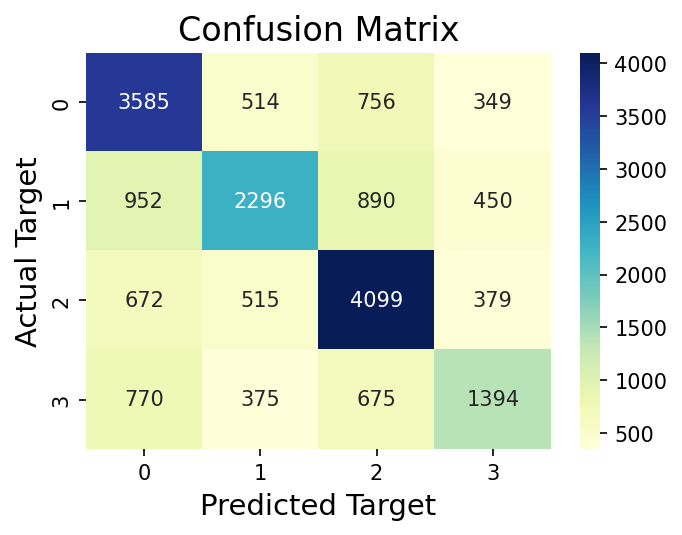

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
naive_cm = confusion_matrix(ytest, bayes_pred)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')